# Social Media and Mental Health: A Correlational and Predictive Analysis

## Project Overview
This notebook analyzes the relationship between social media usage patterns and mental health indicators. We used a two step approach:
- Exploratory Data Analysis: Explore the correlation between the habits of using social media and the wellness of people who conducted the survey.
- Predictive modelling: We build a predictive model (Ridge Regression) to estimate stress levels, happiness index, and sleep quality based on new user lifestyle profiles and digital behavior.
- The dataset that we used can be found here: https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset/data

**Objectives:**
1. Predict mental health scores (Stress, Happiness, Sleep Quality) from social media usage patterns
2. Identify key factors influencing mental health
3. Provide visual comparisons between different user profiles
4. Generate actionable insights for digital wellness

**Dataset Features:**
- Demographic information (Age, Gender)
- Digital behavior (Daily screen time, Social media platform)
- Wellness habits (Exercise frequency, Days without social media)
- Mental health indicators (Stress level, Happiness index, Sleep quality - all on 1-10 scale)

## A. Exploratory Data Analysis (EDA)

1. Imports and Setup

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



2. Data loading

In [149]:
file_path = 'Mental_Health_and_Social_Media_Balance_Dataset.csv'

df = pd.read_csv(file_path)
print("Data loaded successfully!")

Data loaded successfully!


3. Initial Inspection

In [150]:
print("--- Dataset Structure ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df.describe())

--- Dataset Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
None

--- First 5 Rows ---
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male              

4. Data Cleaning
This script prepares a "perfect" dataset where:
- All column names are safe to use as variables (no spaces/symbols).
- Every single row is unique.
- Every single cell has data (no blanks).

In [151]:
def clean_column_names(col_name):
    return re.sub(r'[^a-zA-Z0-9]', '_', col_name)

df.columns = [clean_column_names(c) for c in df.columns]
print(f"\n--- Cleaned Column Names ---\n{df.columns.tolist()}")

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

analysis_folder = 'analysis'
os.makedirs(analysis_folder, exist_ok=True)
print(f"\n Analysis folder '{analysis_folder}' ready for saving graphs.")


--- Cleaned Column Names ---
['User_ID', 'Age', 'Gender', 'Daily_Screen_Time_hrs_', 'Sleep_Quality_1_10_', 'Stress_Level_1_10_', 'Days_Without_Social_Media', 'Exercise_Frequency_week_', 'Social_Media_Platform', 'Happiness_Index_1_10_']

 Analysis folder 'analysis' ready for saving graphs.


5. Univariate Analysis (Distributions)

5.1 Categorical Distribution (Platform)
This script provides insights into the distribution of platforms used by the participants in the form of a bar chart.

Found Platform columns: ['Social_Media_Platform']

--- Platform Popularity (Social_Media_Platform) ---
[('TikTok', 95), ('X (Twitter)', 88), ('LinkedIn', 87), ('Facebook', 81), ('YouTube', 75), ('Instagram', 74)]


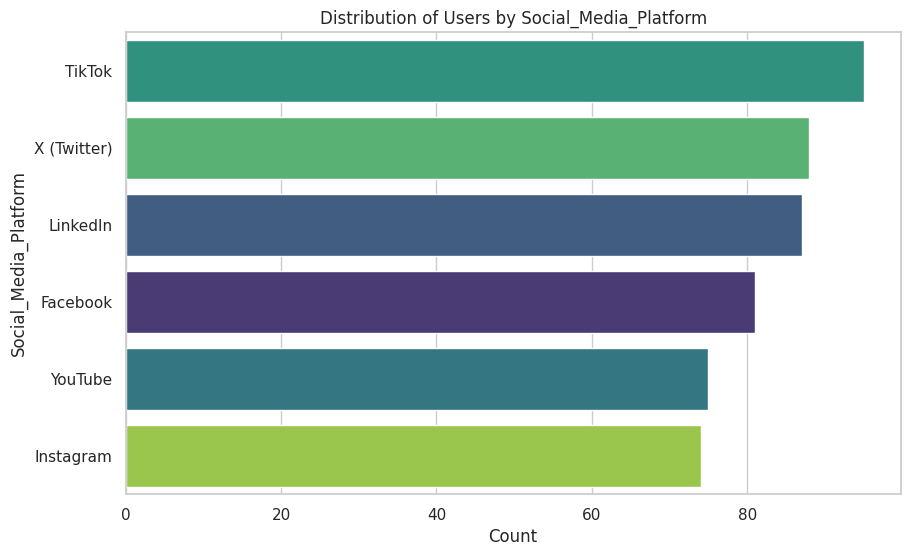

Saved: analysis/social_media_platform_distribution.png


In [152]:
platform_col_name = [c for c in df.columns if 'Platform' in c]

if platform_col_name:
    print(f"Found Platform columns: {platform_col_name}")

    for target_col in platform_col_name:
        platform_list = df[target_col].tolist()
        platform_counts = Counter(platform_list)

        print(f"\n--- Platform Popularity ({target_col}) ---")
        print(platform_counts.most_common())

        # Visualization
        plt.figure(figsize=(10, 6))
        sns.countplot(y=target_col, data=df, order=df[target_col].value_counts().index, palette='viridis', hue=target_col, legend=False)
        plt.title(f'Distribution of Users by {target_col}')
        plt.xlabel('Count')
        plt.ylabel(target_col)
        filename = f"{target_col.lower()}_distribution.png"
        plt.savefig(os.path.join(analysis_folder, filename), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Saved: {os.path.join(analysis_folder, filename)}")
else:
    print("Error: Could not find a column named 'Platform'. Here are your columns:")
    print(df.columns.tolist())

5.2 Numerical Distribution (Age & Usage)
Like last section, this one shows the age distribution and screentime also by using bar charts.

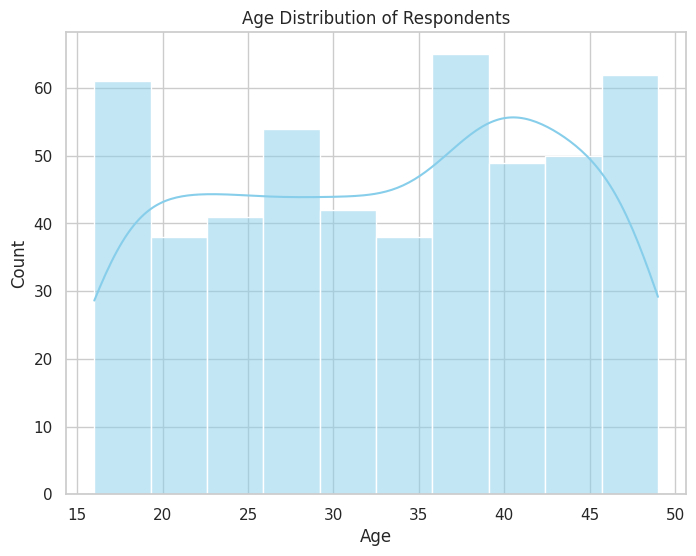

Saved: analysis/age_distribution.png
Found Usage/Time columns: ['Daily_Screen_Time_hrs_']


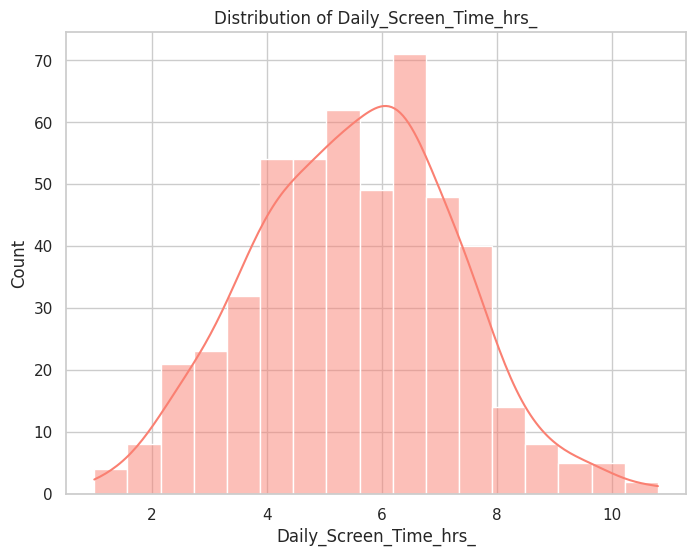

Saved: analysis/Daily_Screen_Time_hrs__distribution.png


In [153]:
usage_cols = [c for c in df.columns if 'Time' in c or 'Usage' in c]

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.savefig(os.path.join(analysis_folder, 'age_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"Saved: {os.path.join(analysis_folder, 'age_distribution.png')}")

# Time Spent Distribution (Loop through all found)
if usage_cols:
    print(f"Found Usage/Time columns: {usage_cols}")
    for u_col in usage_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[u_col], kde=True, color='salmon')
        plt.title(f'Distribution of {u_col}')
        filename = f"{u_col}_distribution.png"
        plt.savefig(os.path.join(analysis_folder, filename), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Saved: {os.path.join(analysis_folder, filename)}")
else:
    print("Could not identify Usage/Time columns.")

## 6. Bivariate Analysis (Relationships)
To explain the relationship of mental health and social media use, we use boxplots and scatter plots to see if the stress, happiness and sleep get influenced by platforms and screen time.


--- Generating Plots for: ['Sleep_Quality_1_10_', 'Stress_Level_1_10_', 'Happiness_Index_1_10_'] ---


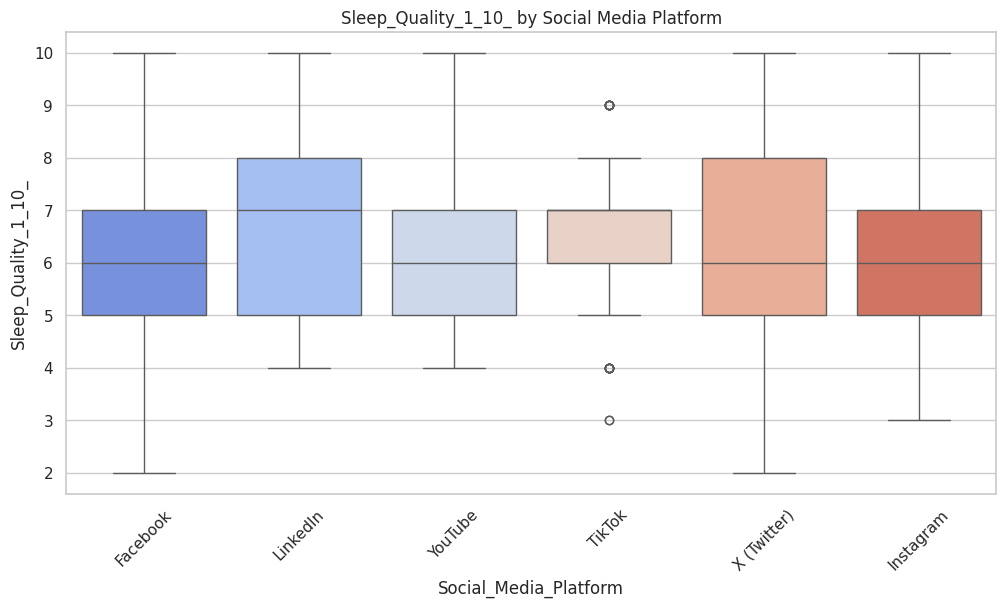

Saved: analysis/platform_vs_Sleep_Quality_1_10_.png


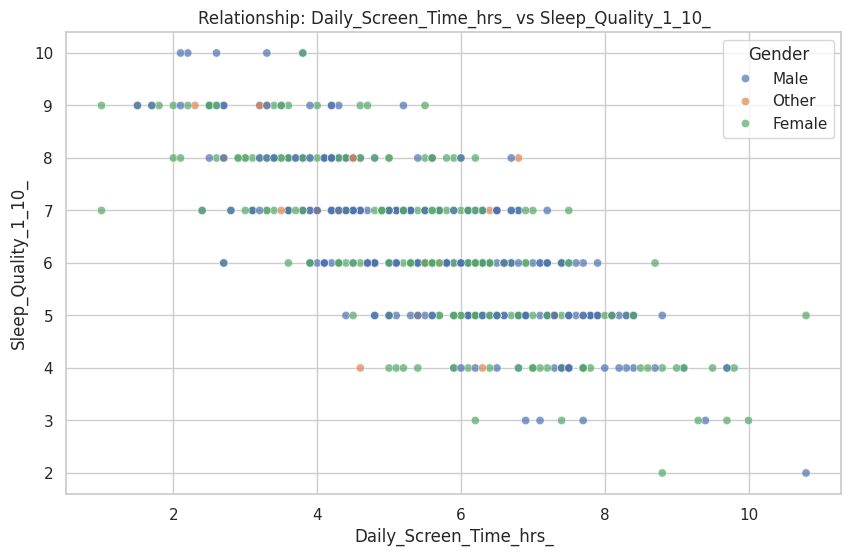

Saved: analysis/usage_vs_Sleep_Quality_1_10__scatter.png


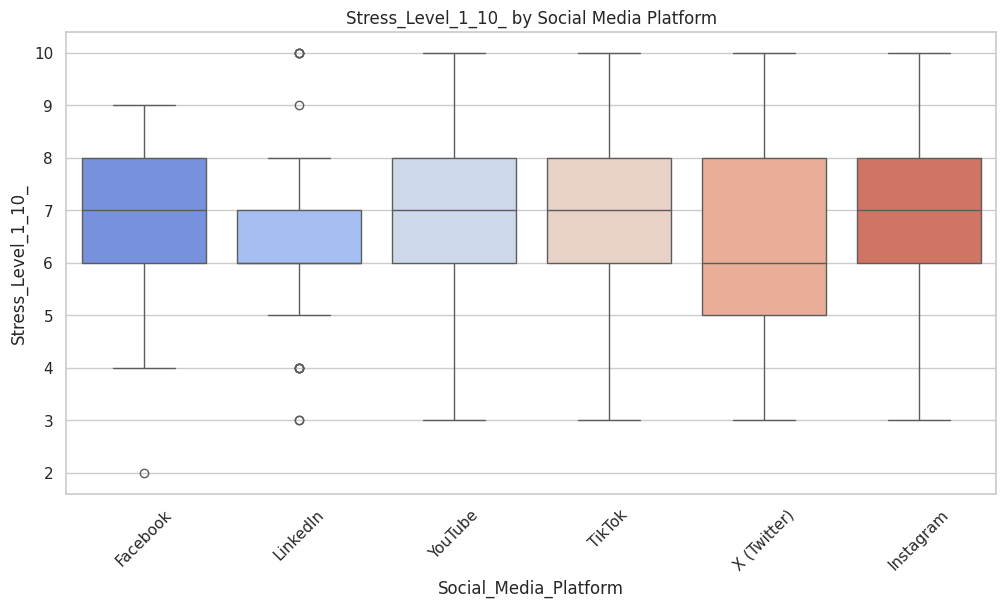

Saved: analysis/platform_vs_Stress_Level_1_10_.png


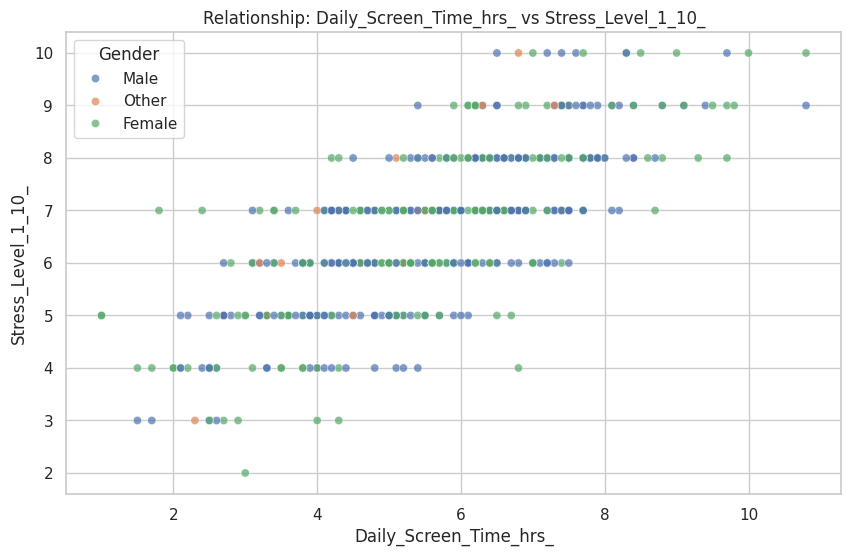

Saved: analysis/usage_vs_Stress_Level_1_10__scatter.png


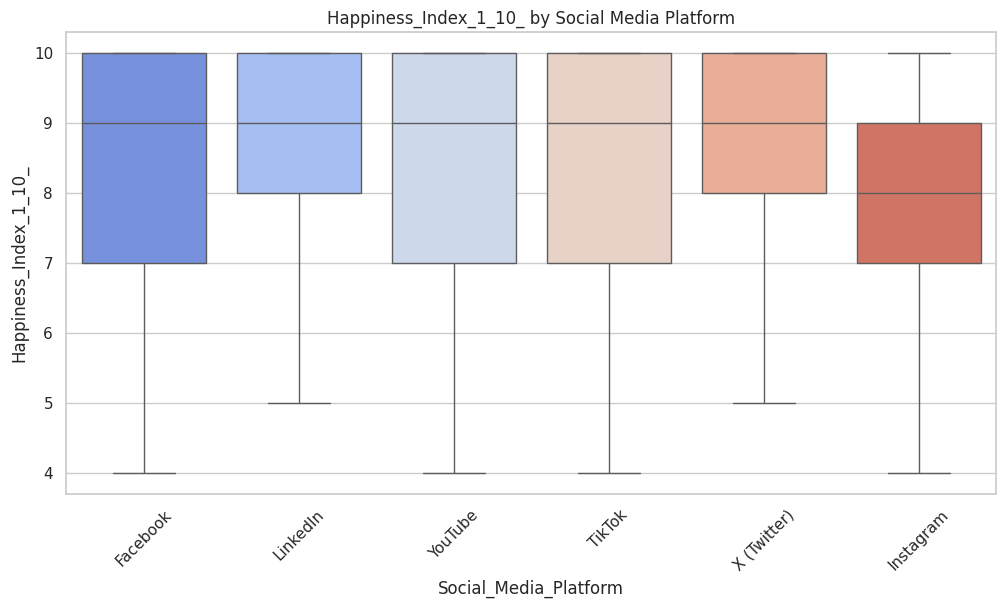

Saved: analysis/platform_vs_Happiness_Index_1_10_.png


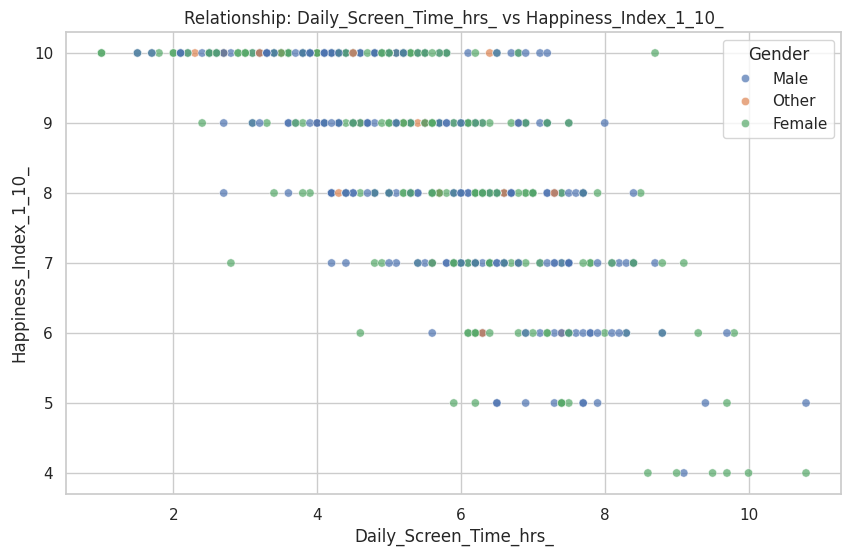

Saved: analysis/usage_vs_Happiness_Index_1_10__scatter.png


In [154]:
score_cols = [c for c in df.columns if any(x in c for x in ['Stress', 'Happiness', 'Sleep'])]

if len(score_cols) > 0:
    platform_col_detected = [c for c in df.columns if 'Platform' in c][0]

    print(f"\n--- Generating Plots for: {score_cols} ---")

    for score in score_cols:
        # Boxplot: Platform vs Score
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=platform_col_detected, y=score, data=df, palette='coolwarm', hue=platform_col_detected, legend=False)
        plt.title(f'{score} by Social Media Platform')
        plt.xticks(rotation=45)
        box_filename = f'platform_vs_{score}.png'
        plt.savefig(os.path.join(analysis_folder, box_filename), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Saved: {os.path.join(analysis_folder, box_filename)}")

        # Scatter Plot: Usage vs Score
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=u_col, y=score, data=df, hue='Gender', alpha=0.7)
        plt.title(f'Relationship: {u_col} vs {score}')
        scatter_filename = f'usage_vs_{score}_scatter.png'
        plt.savefig(os.path.join(analysis_folder, scatter_filename), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Saved: {os.path.join(analysis_folder, scatter_filename)}")
else:
    print("Could not automatically identify Score columns for Boxplot.")

## 7. Multivariate Analysis (Correlation)
In this script, we use the correlation matrix to indentify the dependencies further and try to come up with real measurement for it. We take every numberical value into consideration so the correlation is sufficient.

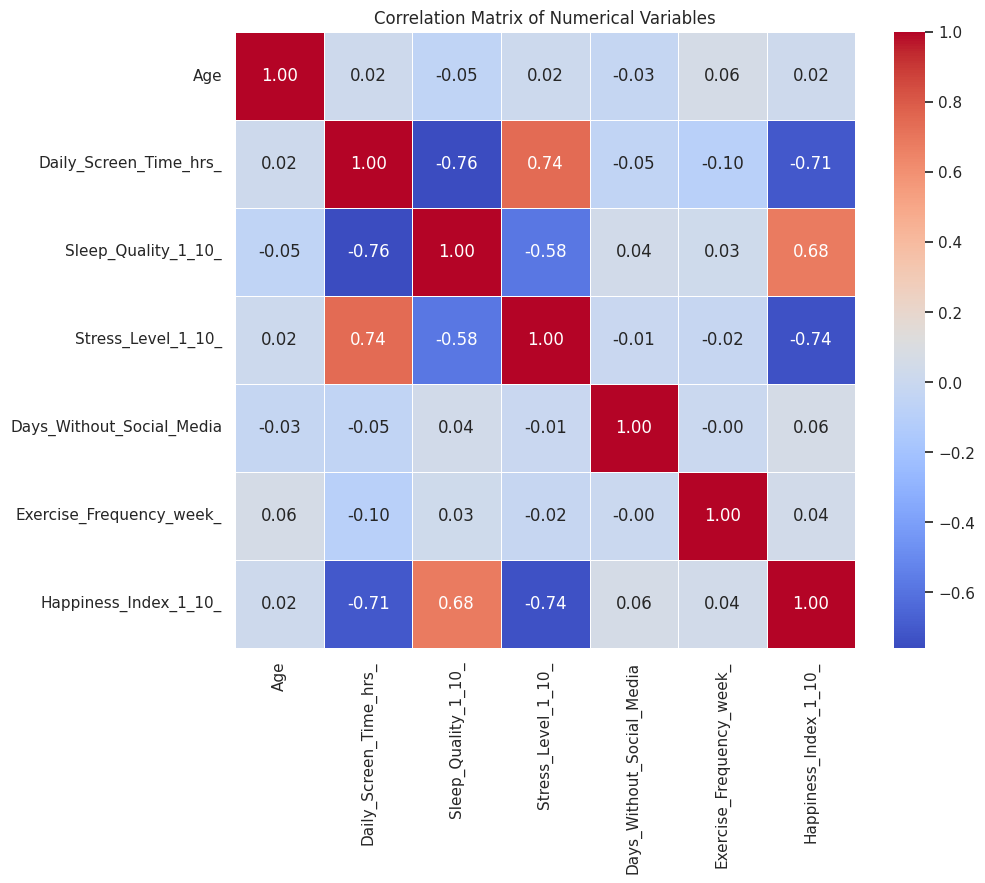

Saved: analysis/correlation_heatmap.png


In [155]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

if not numeric_df.empty:
    plt.figure(figsize=(10, 8))
    # Calculating correlation matrix
    corr_matrix = numeric_df.corr()

    # Plotting heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.savefig(os.path.join(analysis_folder, 'correlation_heatmap.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Saved: {os.path.join(analysis_folder, 'correlation_heatmap.png')}")
else:
    print("No numeric data available for correlation heatmap.")

## 8. Conclusion / Summary
Summarizes key findings such as the most popular platform, average usage time, and maximum observed mental health scores.

In [156]:
print("\n--- Automated Insights ---")
if platform_col_name:
    for p_col in platform_col_name:
         print(f"1. Most popular platform ({p_col}): {df[p_col].value_counts().idxmax()}")

if usage_cols:
    for u_col in usage_cols:
        print(f"2. Average time spent online ({u_col}): {df[u_col].mean():.2f} units")

if len(score_cols) > 0:
    for s_col in score_cols:
        print(f"3. Max {s_col} observed: {df[s_col].max()}")
print("\nEnd of Analysis.")


--- Automated Insights ---
1. Most popular platform (Social_Media_Platform): TikTok
2. Average time spent online (Daily_Screen_Time_hrs_): 5.53 units
3. Max Sleep_Quality_1_10_ observed: 10.0
3. Max Stress_Level_1_10_ observed: 10.0
3. Max Happiness_Index_1_10_ observed: 10.0

End of Analysis.


## B. Predictive Modelling
Import the required libraries such as pandas, numpy, sklearn (Ridge), matplotlib

In [157]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

## 1. Data Loading and Initial Exploration
Load the raw dataset and show brief details about the content

In [158]:
# Load the dataset
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

# Display dataset information
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)
print(f"Dataset Shape: {df.shape}")
print(f"Number of users: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print("\nDataset columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

DATASET OVERVIEW
Dataset Shape: (500, 10)
Number of users: 500
Number of features: 10

Dataset columns:
['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']

First 5 rows:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2            

## 2. Data Preparation and Target Definition
Define multiple target variables such as:
- Stress Level (1-10)
- Happiness Index (1-10)
- Sleep Quality (1-10)

The used features for predicting the target variables are:
Features used for prediction:
 - Age
 - Gender
 - Daily_Screen_Time(hrs)
 - Days_Without_Social_Media
 - Exercise_Frequency(week)
 - Social_Media_Platform

In [159]:
# Define target variables
targets = ['Stress_Level(1-10)', 'Happiness_Index(1-10)', 'Sleep_Quality(1-10)']

# Identify non-predictor columns to exclude
non_predictors = ['User_ID'] + [c for c in df.columns if c not in targets and
                                (c.startswith('Happiness') or c.startswith('Stress') or c.startswith('Sleep'))]

# Separate features (X) and targets (y)
X = df.drop(columns=targets + non_predictors)
y = df[targets]

print("=" * 70)
print("DATA PREPARATION")
print("=" * 70)
print(f"Features (X) shape: {X.shape}")
print(f"Targets (y) shape: {y.shape}")
print(f"\nFeatures used for prediction:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")
print(f"\nTarget variables to predict:")
for i, target in enumerate(targets, 1):
    print(f"{i:2d}. {target}")

DATA PREPARATION
Features (X) shape: (500, 6)
Targets (y) shape: (500, 3)

Features used for prediction:
 1. Age
 2. Gender
 3. Daily_Screen_Time(hrs)
 4. Days_Without_Social_Media
 5. Exercise_Frequency(week)
 6. Social_Media_Platform

Target variables to predict:
 1. Stress_Level(1-10)
 2. Happiness_Index(1-10)
 3. Sleep_Quality(1-10)


### Data Splitting Strategy
We split the data into training (80%) and testing (20%) in order to evaluate model performance and accuracy.

## 3. Feature Engineering and Preprocessing
Create basic feature engineering and identify numerical and categorical features

In [160]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("=" * 70)
print("FEATURE CATEGORIZATION")
print("=" * 70)
print(f"Numeric features ({len(numeric_features)}):")
for feat in numeric_features:
    print(f"  - {feat}")
print(f"\nCategorical features ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"  - {feat}")

FEATURE CATEGORIZATION
Numeric features (4):
  - Age
  - Daily_Screen_Time(hrs)
  - Days_Without_Social_Media
  - Exercise_Frequency(week)

Categorical features (2):
  - Gender
  - Social_Media_Platform


### Preprocessing Pipeline
We create separate pipelines for numeric and categorical features:
- **Numeric features**: Impute missing values with median, then standardize
- **Categorical features**: Impute missing values with mode, then one-hot encode

In [161]:
# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize to mean=0, std=1
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convert categories to numbers
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("DATA SPLITTING")
print("=" * 70)
print(f"Training set size: {X_train.shape[0]} users ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} users ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

DATA SPLITTING
Training set size: 400 users (80.0%)
Testing set size: 100 users (20.0%)
Number of features: 6


## 4. Model Building: Linear Regression (Ridge)

We use **Ridge Regression** (regularized linear regression) because:
1. It handles multicollinearity better than ordinary least squares
2. It prevents overfitting through L2 regularization
3. It provides interpretable coefficients
4. It performed best in our comparative analysis (R² = 0.55) against Random Forest (R² < 0.5)

In [162]:
# Build the model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(  # Handle multiple targets
        Ridge(alpha=1.0, random_state=42)
    ))
])

# Train the model
print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training complete!")


Training the model...
Model training complete!


## 5. Model Evaluation

**Evaluation Metrics Explained:**

- **R² Score:** Proportion of variance explained (0–1, higher is better)  
- **RMSE:** Root Mean Squared Error (lower is better)  
- **MAE:** Mean Absolute Error (lower is better)


In [163]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Clip predictions to valid range (1-10 scale)
y_pred = np.clip(y_pred, 1, 10)

# Calculate and display performance metrics
results = {}
for i, target_name in enumerate(targets):
    y_true_i = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    results[target_name] = {
        'R2': r2_score(y_true_i, y_pred_i),
        'RMSE': np.sqrt(mean_squared_error(y_true_i, y_pred_i)),
        'MAE': mean_absolute_error(y_true_i, y_pred_i)
    }

    print(f"\n{target_name}:")
    print(f"  R² Score: {results[target_name]['R2']:.4f}")
    print(f"  RMSE: {results[target_name]['RMSE']:.4f}")
    print(f"  MAE: {results[target_name]['MAE']:.4f}")

# Create summary dataframe
results_df = pd.DataFrame(results).T
print("\n" + "=" * 70)
print("PERFORMANCE SUMMARY")
print("=" * 70)
print(results_df)


Stress_Level(1-10):
  R² Score: 0.5343
  RMSE: 1.0590
  MAE: 0.8666

Happiness_Index(1-10):
  R² Score: 0.5261
  RMSE: 1.0610
  MAE: 0.8485

Sleep_Quality(1-10):
  R² Score: 0.5581
  RMSE: 0.9564
  MAE: 0.7314

PERFORMANCE SUMMARY
                             R2      RMSE       MAE
Stress_Level(1-10)     0.534328  1.059021  0.866590
Happiness_Index(1-10)  0.526090  1.061047  0.848506
Sleep_Quality(1-10)    0.558126  0.956389  0.731359


### Performance Interpretation
- **R² = 0.55**: Model explains 55% of variance in mental health scores
- **RMSE ~1.0**: Average prediction error is about 1 point on 1-10 scale
- **MAE ~0.8**: Most predictions are within 0.8 points of actual values

## 6. Predicting for New Users

Now we'll use our trained model to predict mental health scores for 5 new hypothetical users with different profiles. These user profiles can be seen in the table below:

| New User | Age | Gender | Daily Screen Time (hrs) | Days Without Social Media | Exercise Frequency (week) | Social Media Platform |
|------|-----|--------|--------------------------|----------------------------|----------------------------|------------------------|
| 1 | 18 | Female | 8 | 1 | 0 | Instagram |
| 2 | 25 | Male | 5 | 2 | 2 | TikTok |
| 3 | 35 | Female | 4 | 3 | 4 | Twitter |
| 4 | 45 | Male | 3 | 4 | 2 | LinkedIn |
| 5 | 60 | Female | 2 | 7 | 2 | Facebook |


In [164]:
# Define 5 new users with different profiles
new_users = pd.DataFrame([
    {
        'Age': 18,
        'Gender': 'Female',
        'Daily_Screen_Time(hrs)': 8,
        'Days_Without_Social_Media': 1,
        'Exercise_Frequency(week)': 0,
        'Social_Media_Platform': 'Instagram'
    },
    {
        'Age': 25,
        'Gender': 'Male',
        'Daily_Screen_Time(hrs)': 5,
        'Days_Without_Social_Media': 2,
        'Exercise_Frequency(week)': 2,
        'Social_Media_Platform': 'TikTok'
    },
    {
        'Age': 35,
        'Gender': 'Female',
        'Daily_Screen_Time(hrs)': 4,
        'Days_Without_Social_Media': 3,
        'Exercise_Frequency(week)': 4,
        'Social_Media_Platform': 'Twitter'
    },
    {
        'Age': 45,
        'Gender': 'Male',
        'Daily_Screen_Time(hrs)': 3,
        'Days_Without_Social_Media': 4,
        'Exercise_Frequency(week)': 2,
        'Social_Media_Platform': 'LinkedIn'
    },
    {
        'Age': 60,
        'Gender': 'Female',
        'Daily_Screen_Time(hrs)': 2,
        'Days_Without_Social_Media': 7,
        'Exercise_Frequency(week)': 2,
        'Social_Media_Platform': 'Facebook'
    }
])

# Prepare new user data
print("\nPreparing new user data...")
for col in X.columns:
    if col not in new_users.columns:
        if col in numeric_features:
            new_users[col] = X_train[col].median() if col in X_train.columns else 0
        else:
            new_users[col] = X_train[col].mode()[0] if col in X_train.columns else 'Unknown'

# Reorder columns to match training data
new_users = new_users[X.columns]

# Make predictions for new users
predicted_values = model.predict(new_users)
predicted_values = np.clip(predicted_values, 1, 10)  # Ensure predictions stay in 1-10 range

# Create prediction dataframe
prediction_df = pd.DataFrame(predicted_values, columns=targets)
prediction_df['User'] = [f'New User {i+1}' for i in range(len(new_users))]

# Display predictions with interpretations
print("\nPredicted Mental Health Scores:")
print("-" * 50)
for i in range(len(prediction_df)):
    print(f"\n{prediction_df.loc[i, 'User']}:")
    for target in targets:
        score = predicted_values[i][targets.index(target)]
        # Add interpretation
        if 'Stress' in target:
            interpretation = "High" if score > 7 else "Moderate" if score > 4 else "Low"
        elif 'Happiness' in target:
            interpretation = "High" if score > 7 else "Moderate" if score > 4 else "Low"
        else:  # Sleep Quality
            interpretation = "Good" if score > 7 else "Average" if score > 4 else "Poor"
        print(f"  {target}: {score:.2f} ({interpretation})")


Preparing new user data...

Predicted Mental Health Scores:
--------------------------------------------------

New User 1:
  Stress_Level(1-10): 8.07 (High)
  Happiness_Index(1-10): 6.76 (Moderate)
  Sleep_Quality(1-10): 4.75 (Average)

New User 2:
  Stress_Level(1-10): 6.25 (Moderate)
  Happiness_Index(1-10): 8.52 (High)
  Sleep_Quality(1-10): 6.91 (Average)

New User 3:
  Stress_Level(1-10): 5.73 (Moderate)
  Happiness_Index(1-10): 9.21 (High)
  Sleep_Quality(1-10): 7.21 (Good)

New User 4:
  Stress_Level(1-10): 4.97 (Moderate)
  Happiness_Index(1-10): 10.00 (High)
  Sleep_Quality(1-10): 8.15 (Good)

New User 5:
  Stress_Level(1-10): 4.07 (Moderate)
  Happiness_Index(1-10): 10.00 (High)
  Sleep_Quality(1-10): 8.58 (Good)


## 7. Data Visualization

### Visualization 1: Radar Chart Comparison

The radar chart shows how each new user compares to the dataset average across all mental health metrics.

- Colored shapes: Individual user profiles
- Red dashed line: Dataset average
- Further from center = Higher score

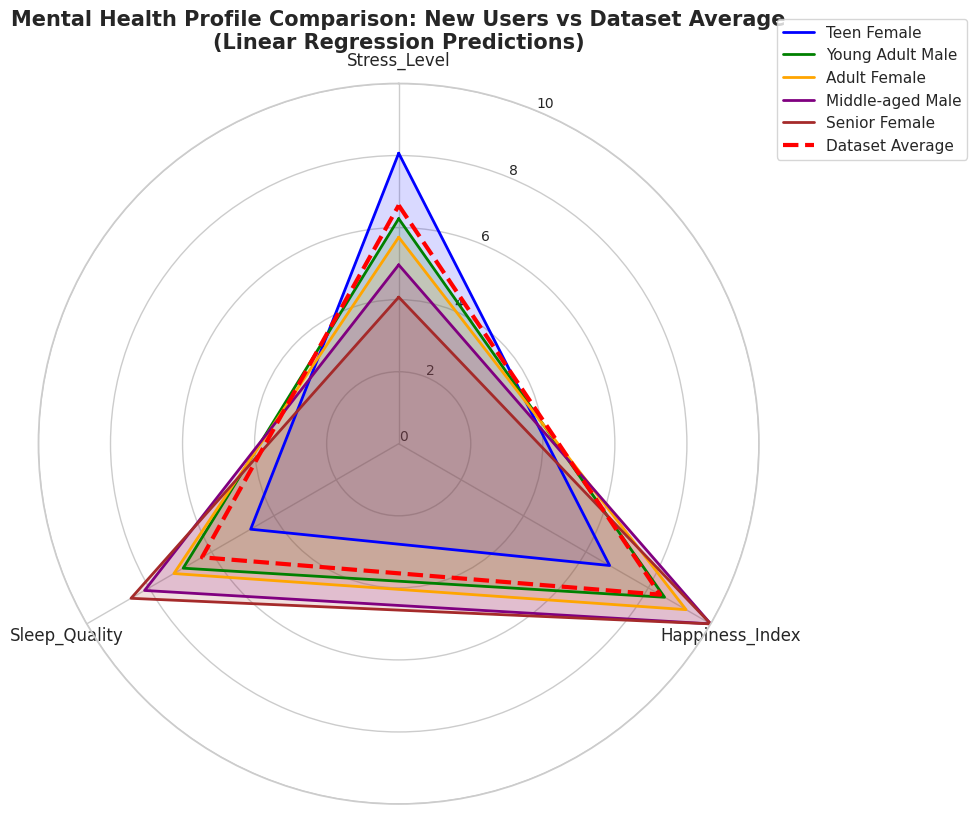

In [165]:
dataset_means = y.mean()

def plot_radar_with_mean(pred_df, targets, dataset_means):
    N = len(targets)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Plot each user
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    user_profiles = ['Teen Female', 'Young Adult Male', 'Adult Female', 'Middle-aged Male', 'Senior Female']

    for i, row in pred_df.iterrows():
        values = row[targets].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=user_profiles[i], color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.15, color=colors[i % len(colors)])

    # Plot dataset average
    mean_values = dataset_means[targets].tolist()
    mean_values += mean_values[:1]
    ax.plot(angles, mean_values, color='red', linewidth=3, linestyle='--', label='Dataset Average')

    # Configure chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([t.replace('(1-10)', '') for t in targets], fontsize=12)
    ax.set_ylim(0, 10)
    ax.set_yticks(range(0, 11, 2))
    ax.set_yticklabels(range(0, 11, 2), fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
    plt.title("Mental Health Profile Comparison: New Users vs Dataset Average\n(Linear Regression Predictions)",
              fontsize=15, pad=25, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_radar_with_mean(prediction_df, targets, dataset_means)

### Visualization 2: Grouped Bar Chart

This bar chart provides a side-by-side comparison of all new users across all mental health metrics.

Key Insights:
- Compare stress levels across different age groups
- Identify patterns in happiness based on screen time
- Observe sleep quality trends

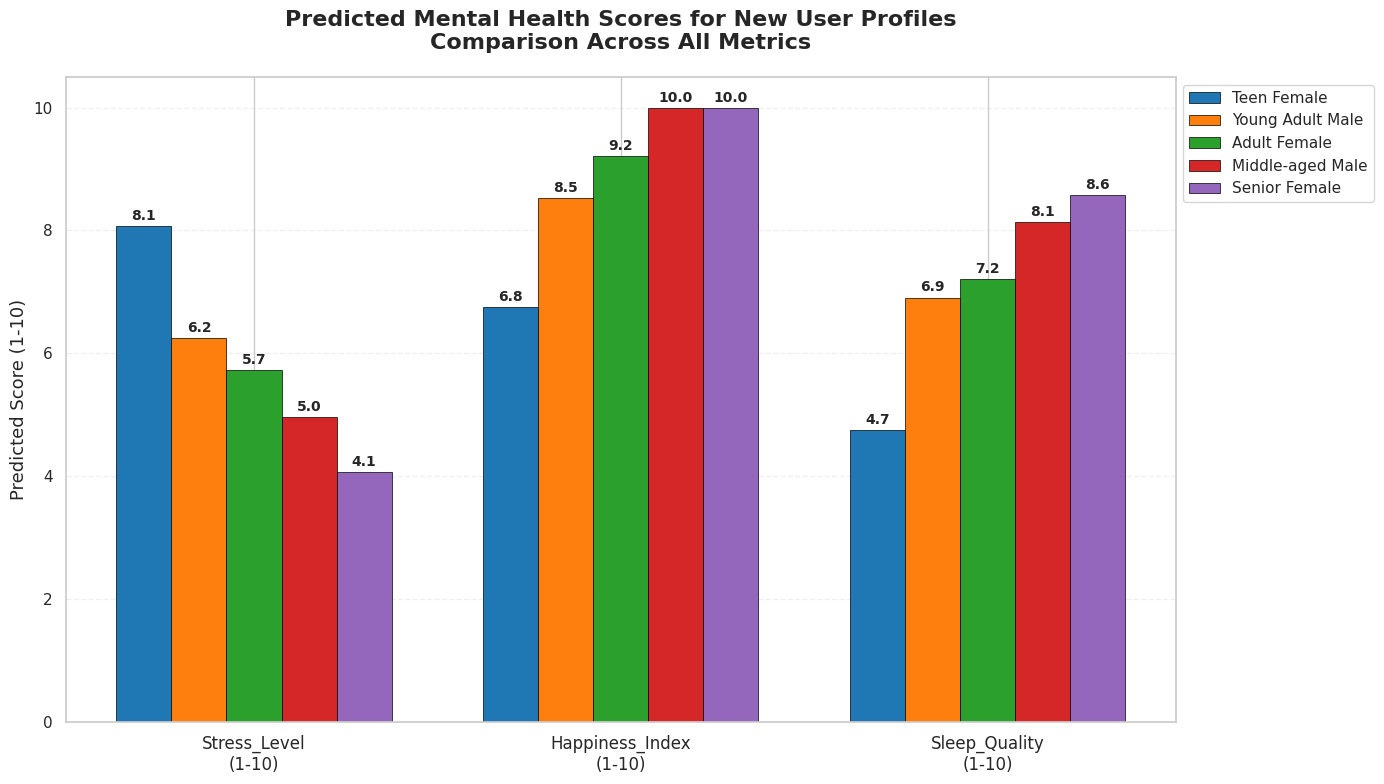

In [166]:
plt.figure(figsize=(14, 8))

x = np.arange(len(targets))
width = 0.15
n_users = len(prediction_df)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
user_labels = ['Teen Female',
               'Young Adult Male',
               'Adult Female',
               'Middle-aged Male',
               'Senior Female']

for i, row in prediction_df.iterrows():
    offset = (i - (n_users - 1) / 2) * width
    bars = plt.bar(x + offset, row[targets], width=width, label=user_labels[i],
                   color=colors[i % len(colors)], edgecolor='black', linewidth=0.5)

    # Add value labels on bars
    for j, value in enumerate(row[targets]):
        plt.text(x[j] + offset, value + 0.05, f'{value:.1f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize chart
plt.xticks(x, [t.replace('(1-10)', '\n(1-10)') for t in targets], fontsize=12)
plt.ylabel("Predicted Score (1-10)", fontsize=13)
plt.title("Predicted Mental Health Scores for New User Profiles\nComparison Across All Metrics",
          fontsize=16, pad=20, fontweight='bold')
plt.ylim(0, 10.5)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.legend(fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Visualization 3: Individual User Profiles

These individual charts show each user's feature values alongside their predicted mental health scores.

In the left panel is shown the User's actual feature values and in the right panel the predicted mental health scores consisting of the target variables: Sleep Quality, Happiness Index, Stress Level.

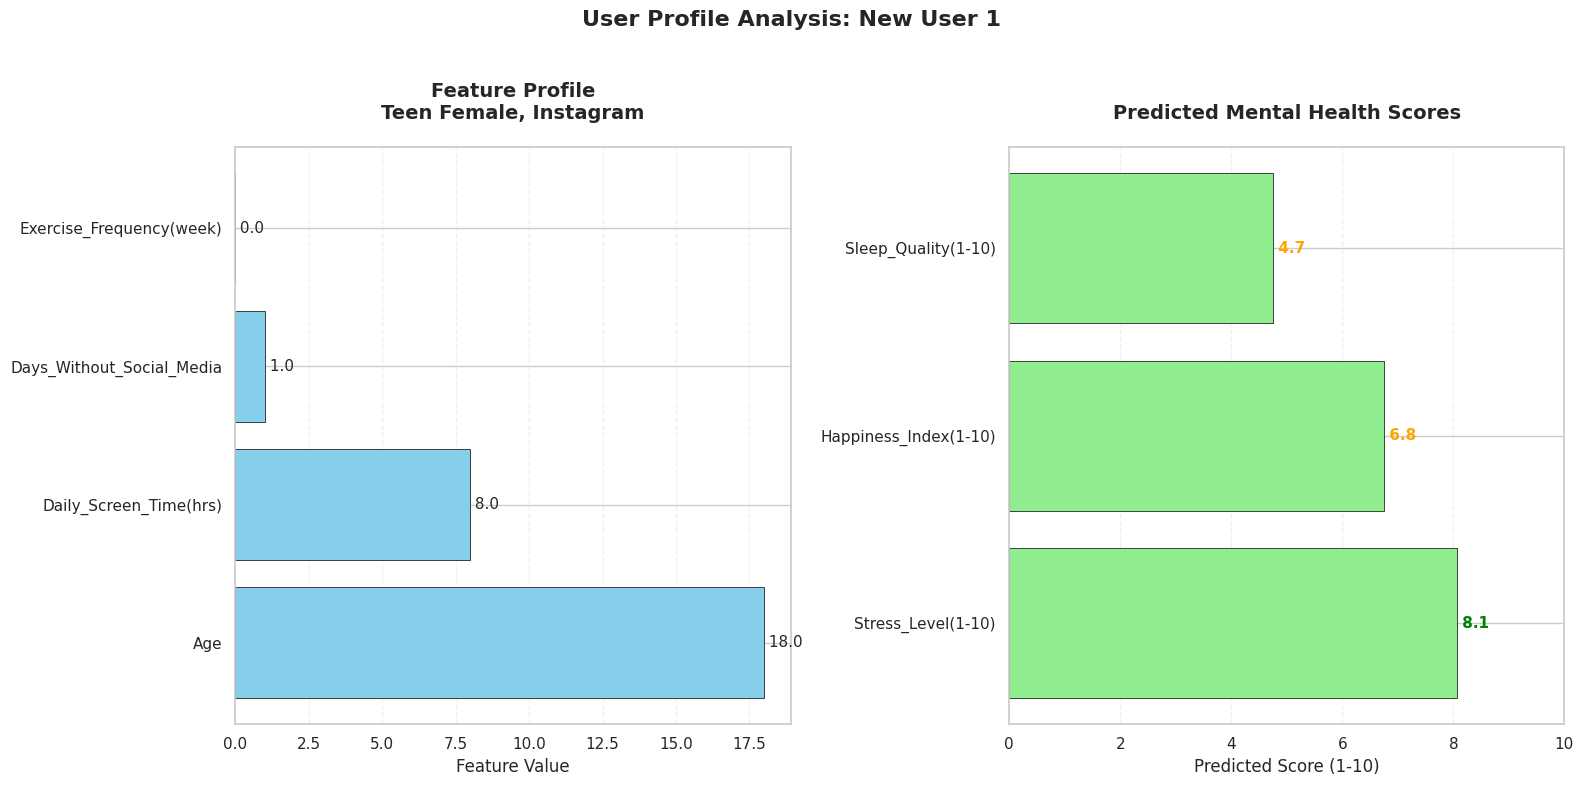

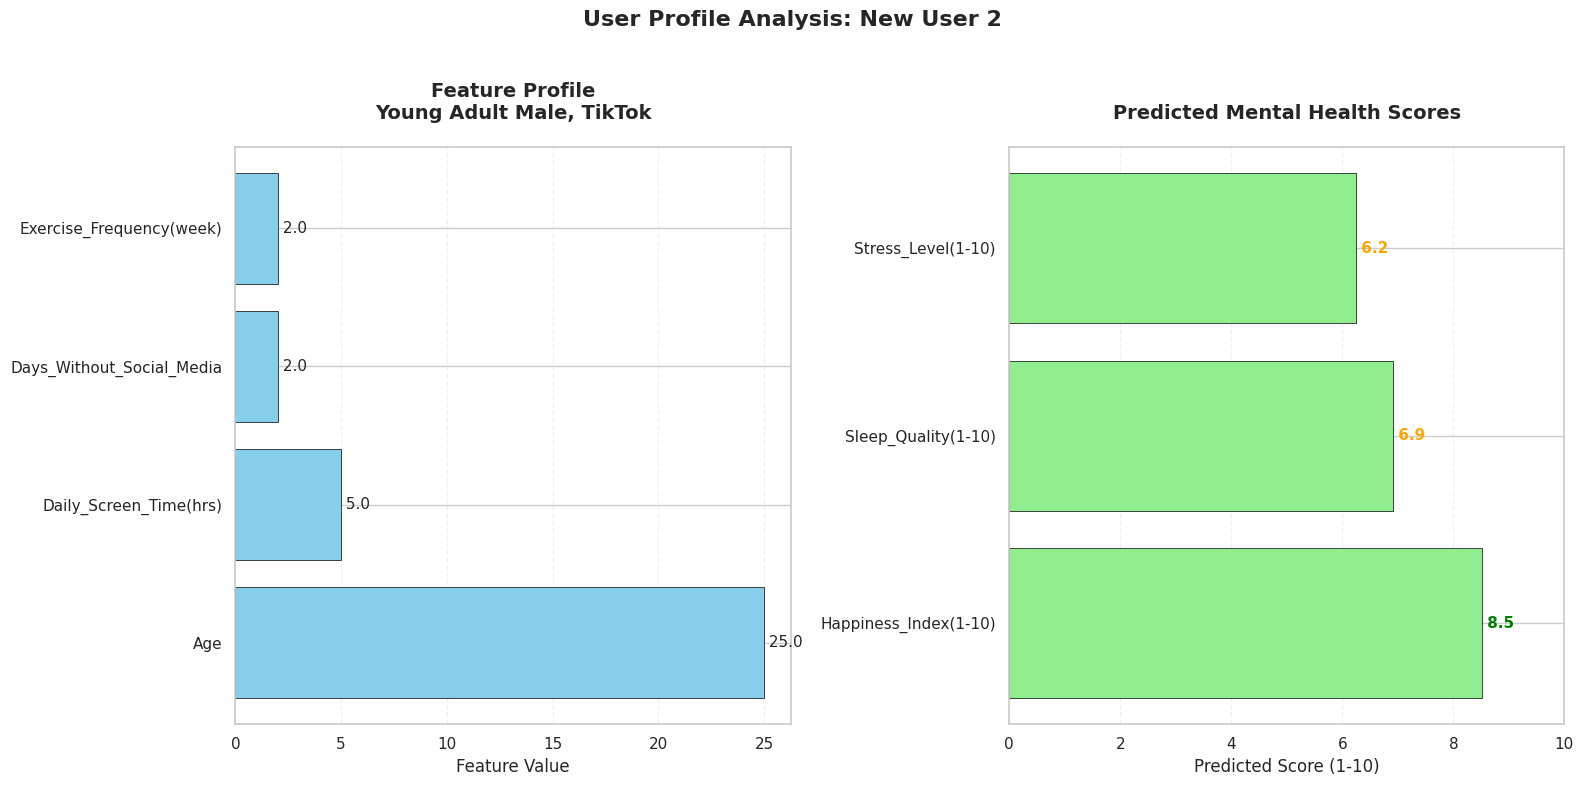

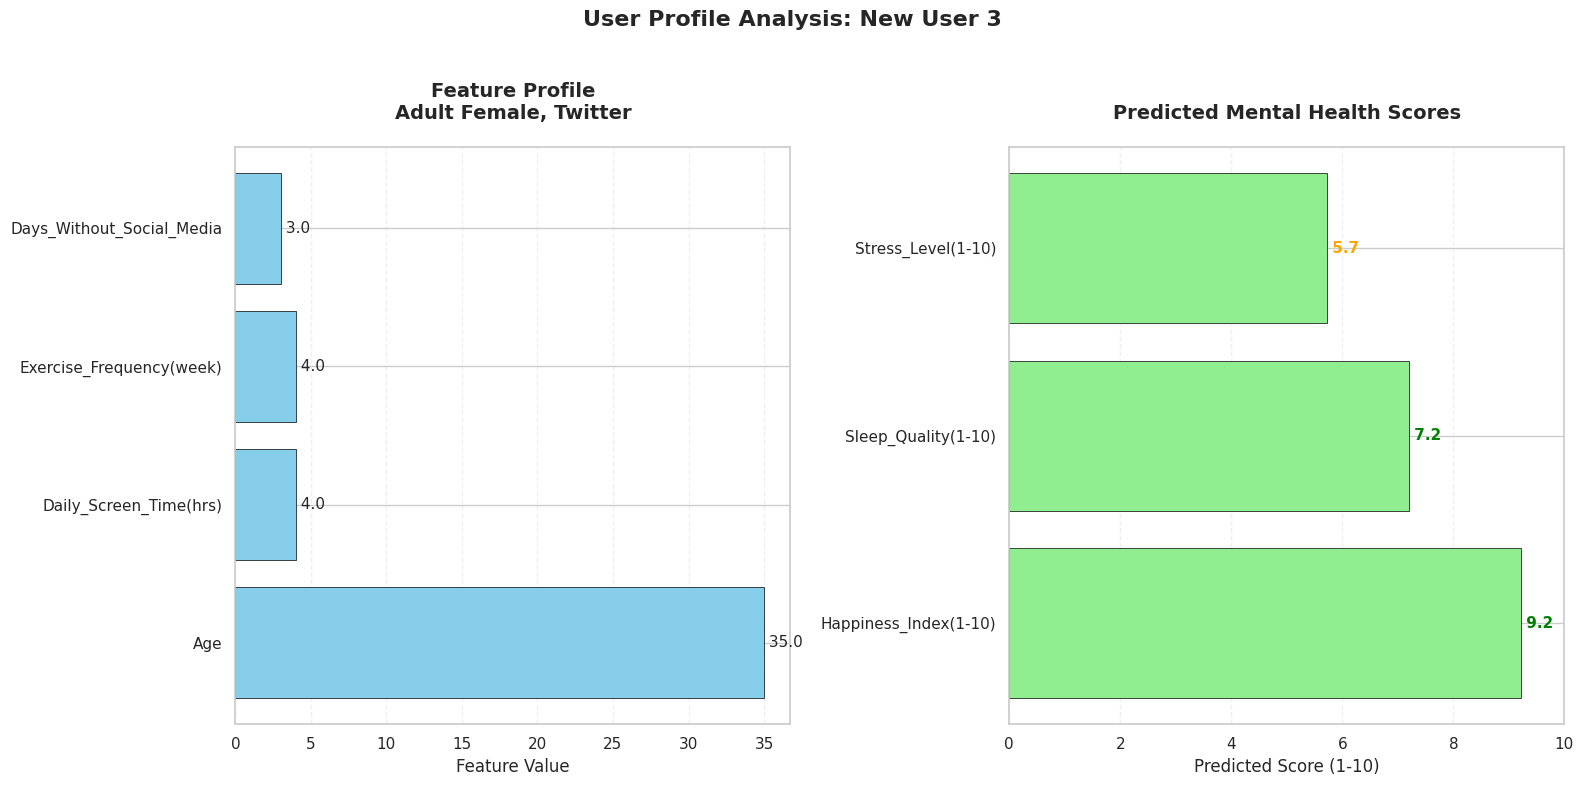

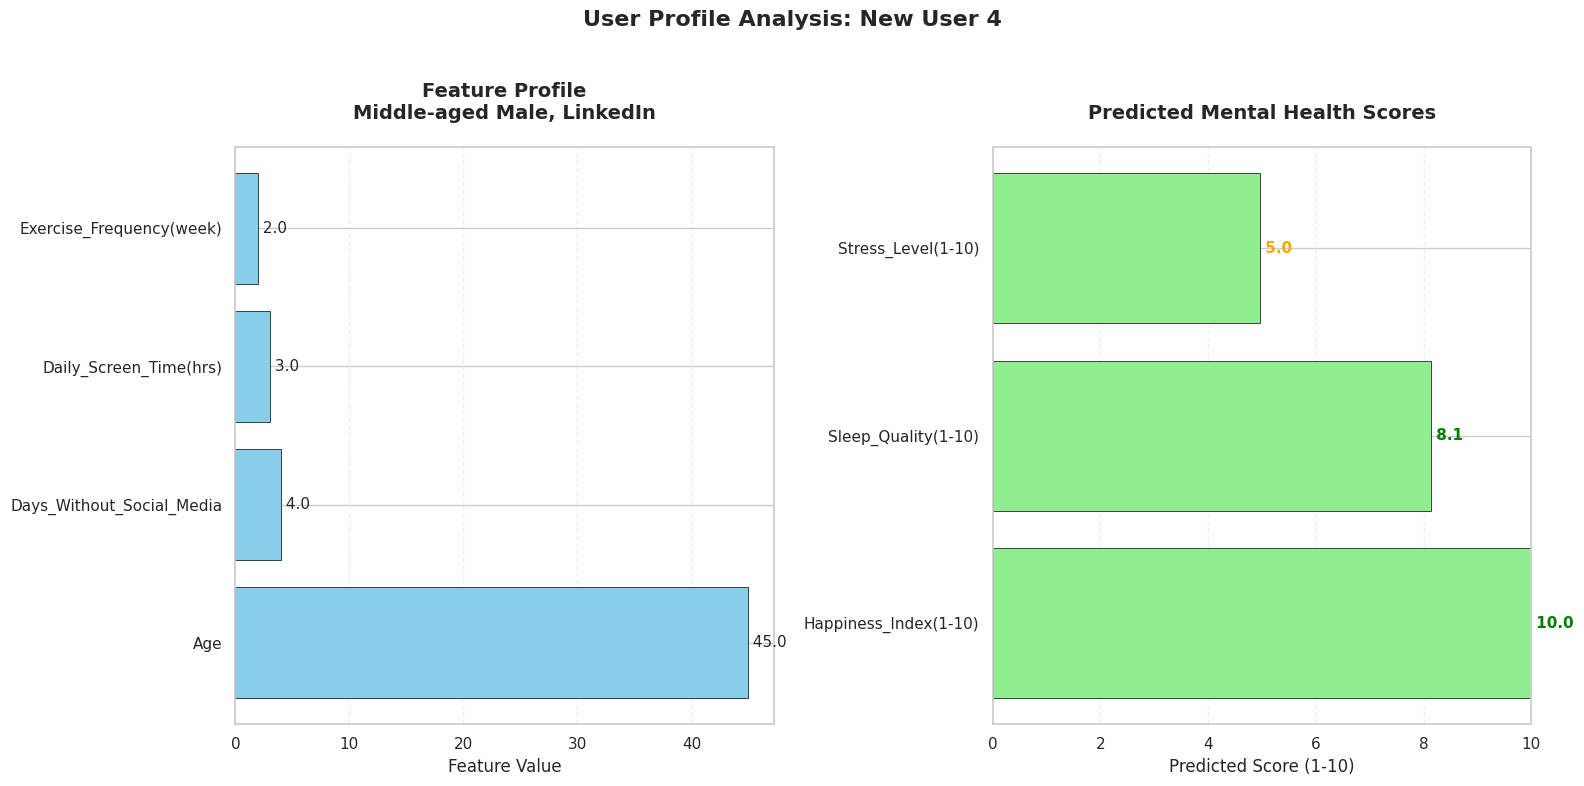

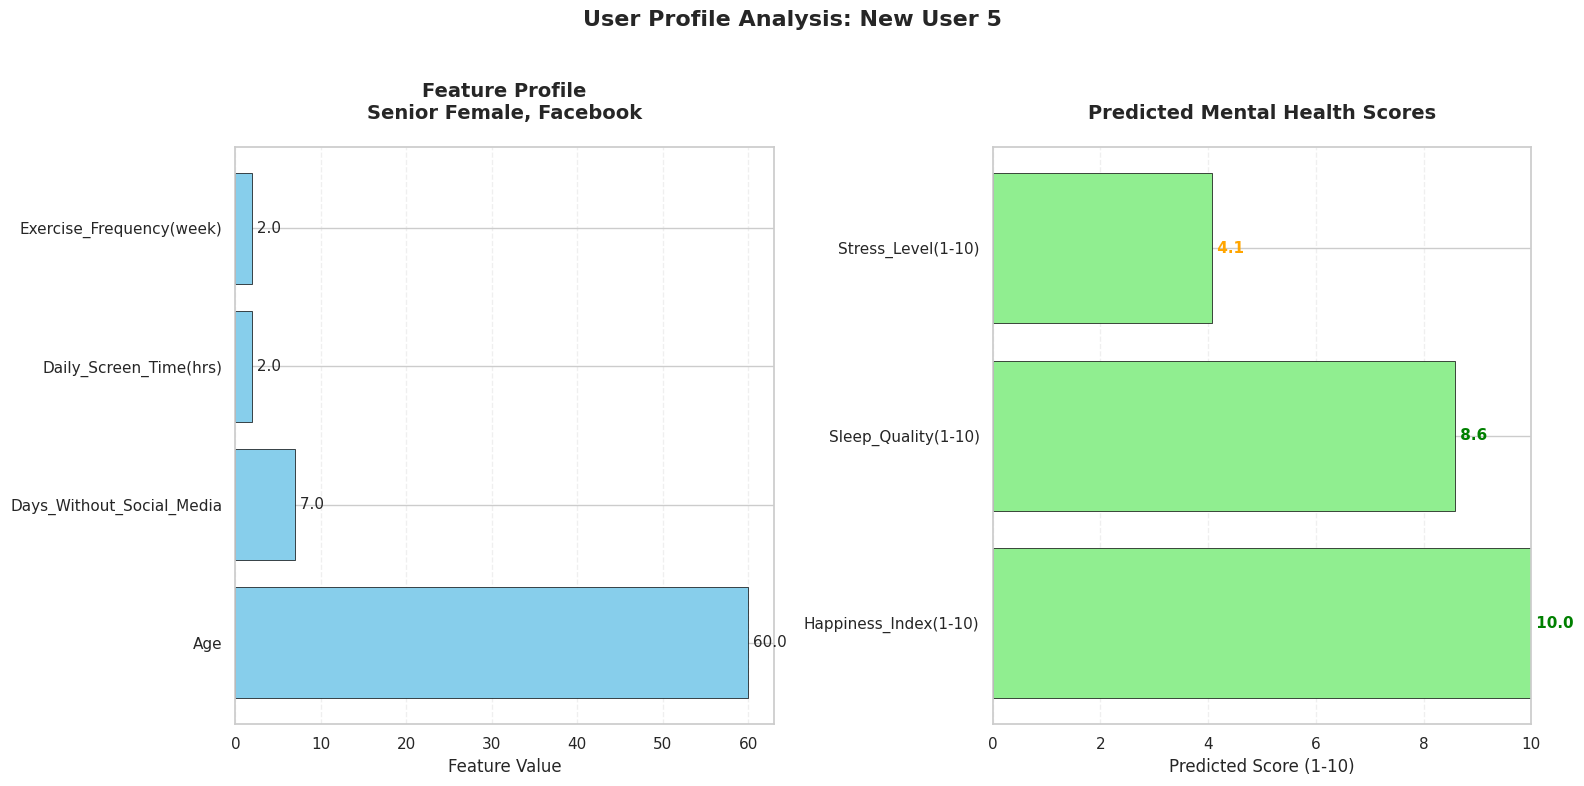

In [167]:
# Combine predictions with feature data
new_users_with_predictions = pd.concat([new_users.reset_index(drop=True),
                                         prediction_df.reset_index(drop=True)], axis=1)

for i, row in new_users_with_predictions.iterrows():
    user_name = f"New User {i+1}"
    profile_desc = [
        "Teen Female, Instagram",
        "Young Adult Male, TikTok",
        "Adult Female, Twitter",
        "Middle-aged Male, LinkedIn",
        "Senior Female, Facebook"
    ][i]

    # Extract feature and predicted values
    feature_values = row[numeric_features].sort_values(ascending=False)
    pred_values = row[targets].sort_values(ascending=False)

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Left: Features (Blue bars)
    axes[0].barh(feature_values.index, feature_values.values,
                 color='skyblue', edgecolor='black', linewidth=0.5)
    axes[0].set_xlabel("Feature Value", fontsize=12)
    axes[0].set_title(f"Feature Profile\n{profile_desc}", fontsize=14, pad=20, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3, linestyle='--')

    # Add values on feature bars
    for index, value in enumerate(feature_values.values):
        axes[0].text(value, index, f' {value:.1f}', va='center', fontsize=11)

    # Right: Predicted Targets (Green bars)
    bars = axes[1].barh(pred_values.index, pred_values.values,
                        color='lightgreen', edgecolor='black', linewidth=0.5)
    axes[1].set_xlabel("Predicted Score (1-10)", fontsize=12)
    axes[1].set_xlim(0, 10)
    axes[1].set_title("Predicted Mental Health Scores", fontsize=14, pad=20, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3, linestyle='--')

    # Add values on prediction bars
    for index, value in enumerate(pred_values.values):
        color = 'red' if value < 4 else 'orange' if value < 7 else 'green'
        axes[1].text(value, index, f' {value:.1f}', va='center',
                      fontsize=11, fontweight='bold', color=color)

    plt.suptitle(f"User Profile Analysis: {user_name}", fontsize=16, y=0.98, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 8. Analysis Summary and Insights
Key Findings:
1. Model Performance: R² = 0.55, shows moderate predictive accuracy
2. Error Range: Predictions are usually within 0.8-1.0 points of actual values
3. Most Influential Factors:
   • Exercise frequency is positively correlated with happiness.
   • Daily screen time is positively correlated to stress.
   • Days without social media metric improves significantly the sleep quality

Future improvements:
1. Gather more data and insights from a wide range of users, to improve model generalization power
2. Add more relevant features to the users
3. Include psychological metrics and other habits that could influence stress (work, kids, financial status)
4. Consider non-linear models to analyze complex correlations

In [168]:
# Calculate summary statistics
avg_r2 = results_df['R2'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_mae = results_df['MAE'].mean()

print(f"\nMODEL PERFORMANCE:")
print("-" * 40)
print(f"Average R² across all targets: {avg_r2:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average MAE: {avg_mae:.4f}")

print(f"\nDATASET STATISTICS:")
print("-" * 40)
print(f"Total users analyzed: {len(df)}")
print(f"Features used: {len(X.columns)}")
print(f"Target variables predicted: {len(targets)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


MODEL PERFORMANCE:
----------------------------------------
Average R² across all targets: 0.5395
Average RMSE: 1.0255
Average MAE: 0.8155

DATASET STATISTICS:
----------------------------------------
Total users analyzed: 500
Features used: 6
Target variables predicted: 3
Training samples: 400
Testing samples: 100


## 9. Export Predictions (Optional)

In [169]:
# save predictions to CSV
output_data = new_users_with_predictions.copy()
output_data['Prediction_Date'] = pd.Timestamp.now().strftime('%Y-%m-%d')

output_file = 'mental_health_predictions.csv'
output_data.to_csv(output_file, index=False)

print(f"\nPredictions saved to: {output_file}")


Predictions saved to: mental_health_predictions.csv
